# Machine Learning Workflow - Step 1 - Environment Prepration: Import software libraries

In [2]:
#Step 1: Prepare your environment



import sys                             # Read system parameters
import os                              # Interact with the operating system
import numpy as np                     # Work with multi-dimensional arrays and matrices
import pandas as pd                    # Manipulate and analyze data
import matplotlib                      # Create 2D charts
import scipy as sp                     # Perform scientific computing and advanced mathematics
import sklearn                         # Perform data mining and analysis
import seaborn as sb                   # Perform data visualization

# Summarize software libraries used
print('Libraries used in this project:')
print('- NumPy {}'.format(np.__version__))
print('- Pandas {}'.format(pd.__version__))
print('- Matplotlib {}'.format(matplotlib.__version__))
print('- SciPy {}'.format(sp.__version__))
print('- Scikit-learn {}'.format(sklearn.__version__))
print('- Python {}\n'.format(sys.version))

Libraries used in this project:
- NumPy 1.23.5
- Pandas 1.5.2
- Matplotlib 3.6.2
- SciPy 1.9.3
- Scikit-learn 1.2.1
- Python 3.8.15 | packaged by conda-forge | (default, Nov 22 2022, 08:53:40) 
[Clang 14.0.6 ]



In [49]:
import seaborn as sb

# Machine Learning Workflow - Step 2 - Environment Prepration: Import software librariesLoad the dataset

In [7]:
PROJECT_ROOT_DIR = '.'
DATA_PATH = os.path.join(PROJECT_ROOT_DIR, 'seoul_bike_data')
print('Data files in this project:', os.listdir(DATA_PATH) )

# Read the raw dataset
data_raw_file = os.path.join( DATA_PATH, 'seoul_bike_data.csv' )
data_raw = pd.read_csv( data_raw_file )
print('Loaded {} records from {}.\n'.format(len(data_raw), data_raw_file))

Data files in this project: ['seoul_bike_data.csv']
Loaded 8394 records from ./seoul_bike_data/seoul_bike_data.csv.



# Get acquainted with the dataset

In [8]:
print(data_raw.info())     # View features and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8394 entries, 0 to 8393
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   bikes_rented  8394 non-null   int64  
 1   temp          8394 non-null   float64
 2   humidity      8394 non-null   int64  
 3   wind_speed    8394 non-null   float64
 4   visibility    8394 non-null   int64  
 5   dew_temp      8394 non-null   float64
 6   solar_rad     8394 non-null   float64
 7   rainfall      8394 non-null   float64
 8   snowfall      8394 non-null   float64
dtypes: float64(6), int64(3)
memory usage: 590.3 KB
None


# Show example records

In [9]:
# View first ten records
print(data_raw.head(10))

   bikes_rented  temp  humidity  wind_speed  visibility  dew_temp  solar_rad  \
0           254  -5.2        37         2.2        2000     -17.6       0.00   
1           204  -5.5        38         0.8        2000     -17.6       0.00   
2           173  -6.0        39         1.0        2000     -17.7       0.00   
3           107  -6.2        40         0.9        2000     -17.6       0.00   
4            78  -6.0        36         2.3        2000     -18.6       0.00   
5           100  -6.4        37         1.5        2000     -18.7       0.00   
6           181  -6.6        35         1.3        2000     -19.5       0.00   
7           460  -7.4        38         0.9        2000     -19.3       0.00   
8           930  -7.6        37         1.1        2000     -19.8       0.01   
9           490  -6.5        27         0.5        1928     -22.4       0.23   

   rainfall  snowfall  
0       0.0       0.0  
1       0.0       0.0  
2       0.0       0.0  
3       0.0       0.0  

In [ ]:
# Identify Dtypes to begin dealing with "0" entries....

In [17]:
# View data types and see if there are missing entries.
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8394 entries, 0 to 8393
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   bikes_rented  8394 non-null   int64  
 1   temp          8394 non-null   float64
 2   humidity      8394 non-null   int64  
 3   wind_speed    8394 non-null   float64
 4   visibility    8394 non-null   int64  
 5   dew_temp      8394 non-null   float64
 6   solar_rad     8394 non-null   float64
 7   rainfall      8394 non-null   float64
 8   snowfall      8394 non-null   float64
dtypes: float64(6), int64(3)
memory usage: 590.3 KB


In [18]:
 data_raw.isnull().sum()

bikes_rented    0
temp            0
humidity        0
wind_speed      0
visibility      0
dew_temp        0
solar_rad       0
rainfall        0
snowfall        0
dtype: int64

# Create a summarized list of general statistics

In [10]:
with pd.option_context('float_format', '{:.2f}'.format): 
    print( data_raw.describe() )

       bikes_rented    temp  humidity  wind_speed  visibility  dew_temp  \
count       8394.00 8394.00   8394.00     8394.00     8394.00   8394.00   
mean         731.37   12.81     58.07        1.74     1433.23      3.96   
std          643.62   12.11     20.48        1.03      609.80     13.24   
min            2.00  -17.80      0.00        0.10       27.00    -30.60   
25%          214.00    3.10     42.00        1.00      932.25     -5.10   
50%          546.00   13.60     57.00        1.50     1690.00      4.80   
75%         1088.00   22.70     74.00        2.30     2000.00     15.20   
max         3556.00   39.40     98.00        7.40     2000.00     27.20   

       solar_rad  rainfall  snowfall  
count    8394.00   8394.00   8394.00  
mean        0.57      0.15      0.08  
std         0.87      1.13      0.45  
min         0.00      0.00      0.00  
25%         0.00      0.00      0.00  
50%         0.01      0.00      0.00  
75%         0.94      0.00      0.00  
max         

# Since we are most concerned with the label of "bikes_rented", idenitify columns with a direct corelation
data_raw.corr()

In [48]:
data_raw.corr()

,bikes_rented,temp,humidity,wind_speed,visibility,dew_temp,solar_rad,rainfall,snowfall
bikes_rented,1.000000,0.563440,-0.201466,0.120961,0.213989,0.401160,0.272748,-0.128794,-0.151881
temp,0.563440,1.000000,0.165484,-0.044827,0.031410,0.914372,0.354692,0.052120,-0.218070
humidity,-0.201466,0.165484,1.000000,-0.336857,-0.549300,0.538730,-0.457904,0.237436,0.110487
wind_speed,0.120961,-0.044827,-0.336857,1.000000,0.184935,-0.182518,0.321812,-0.025538,-0.004840
visibility,0.213989,0.031410,-0.549300,0.184935,1.000000,-0.180199,0.154676,-0.169727,-0.123300
dew_temp,0.401160,0.914372,0.538730,-0.182518,-0.180199,1.000000,0.098152,0.127034,-0.149969
solar_rad,0.272748,0.354692,-0.457904,0.321812,0.154676,0.098152,1.000000,-0.074607,-0.073923
rainfall,-0.128794,0.052120,0.237436,-0.025538,-0.169727,0.127034,-0.074607,1.000000,0.008712
snowfall,-0.151881,-0.218070,0.110487,-0.004840,-0.123300,-0.149969,-0.073923,0.008712,1.000000


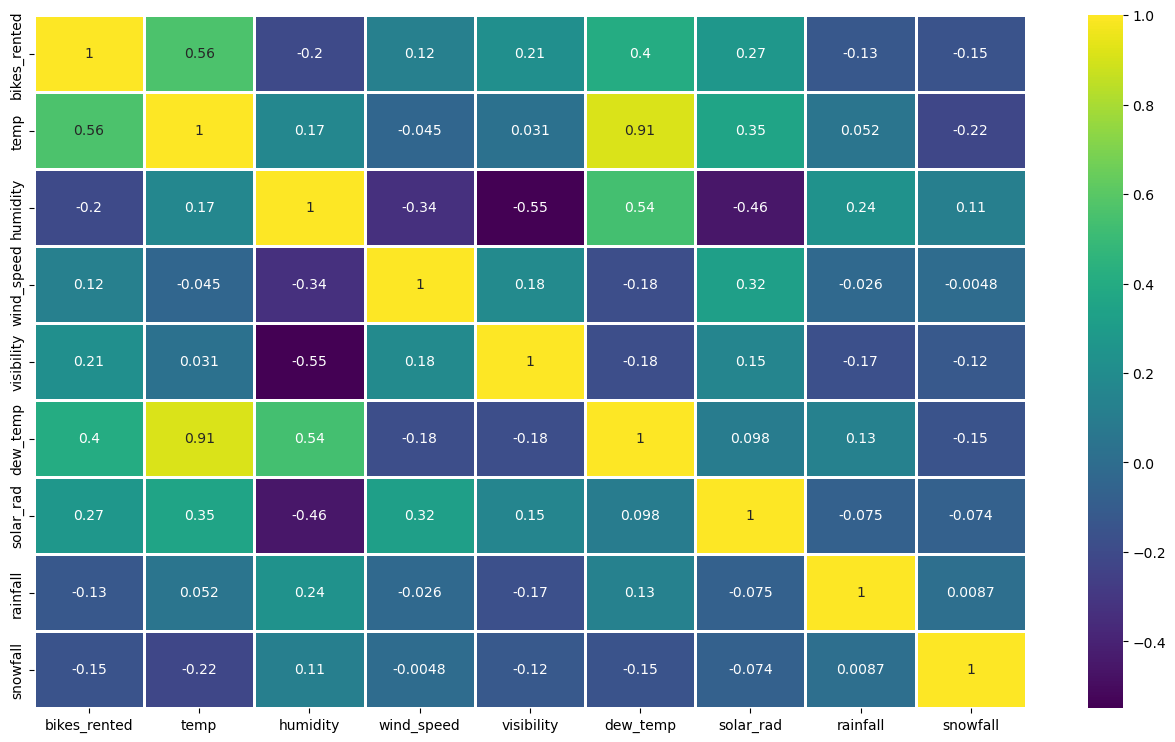

In [50]:
# Seaborn will plot the correlation matrix in heatmap format
plt.figure(figsize=(16,9))
sb.heatmap(data_raw.corr(), cmap='viridis', annot=True, fmt='.2g', linewidths=2)
plt.show()

# Use histograms to visualize the distribution of various features

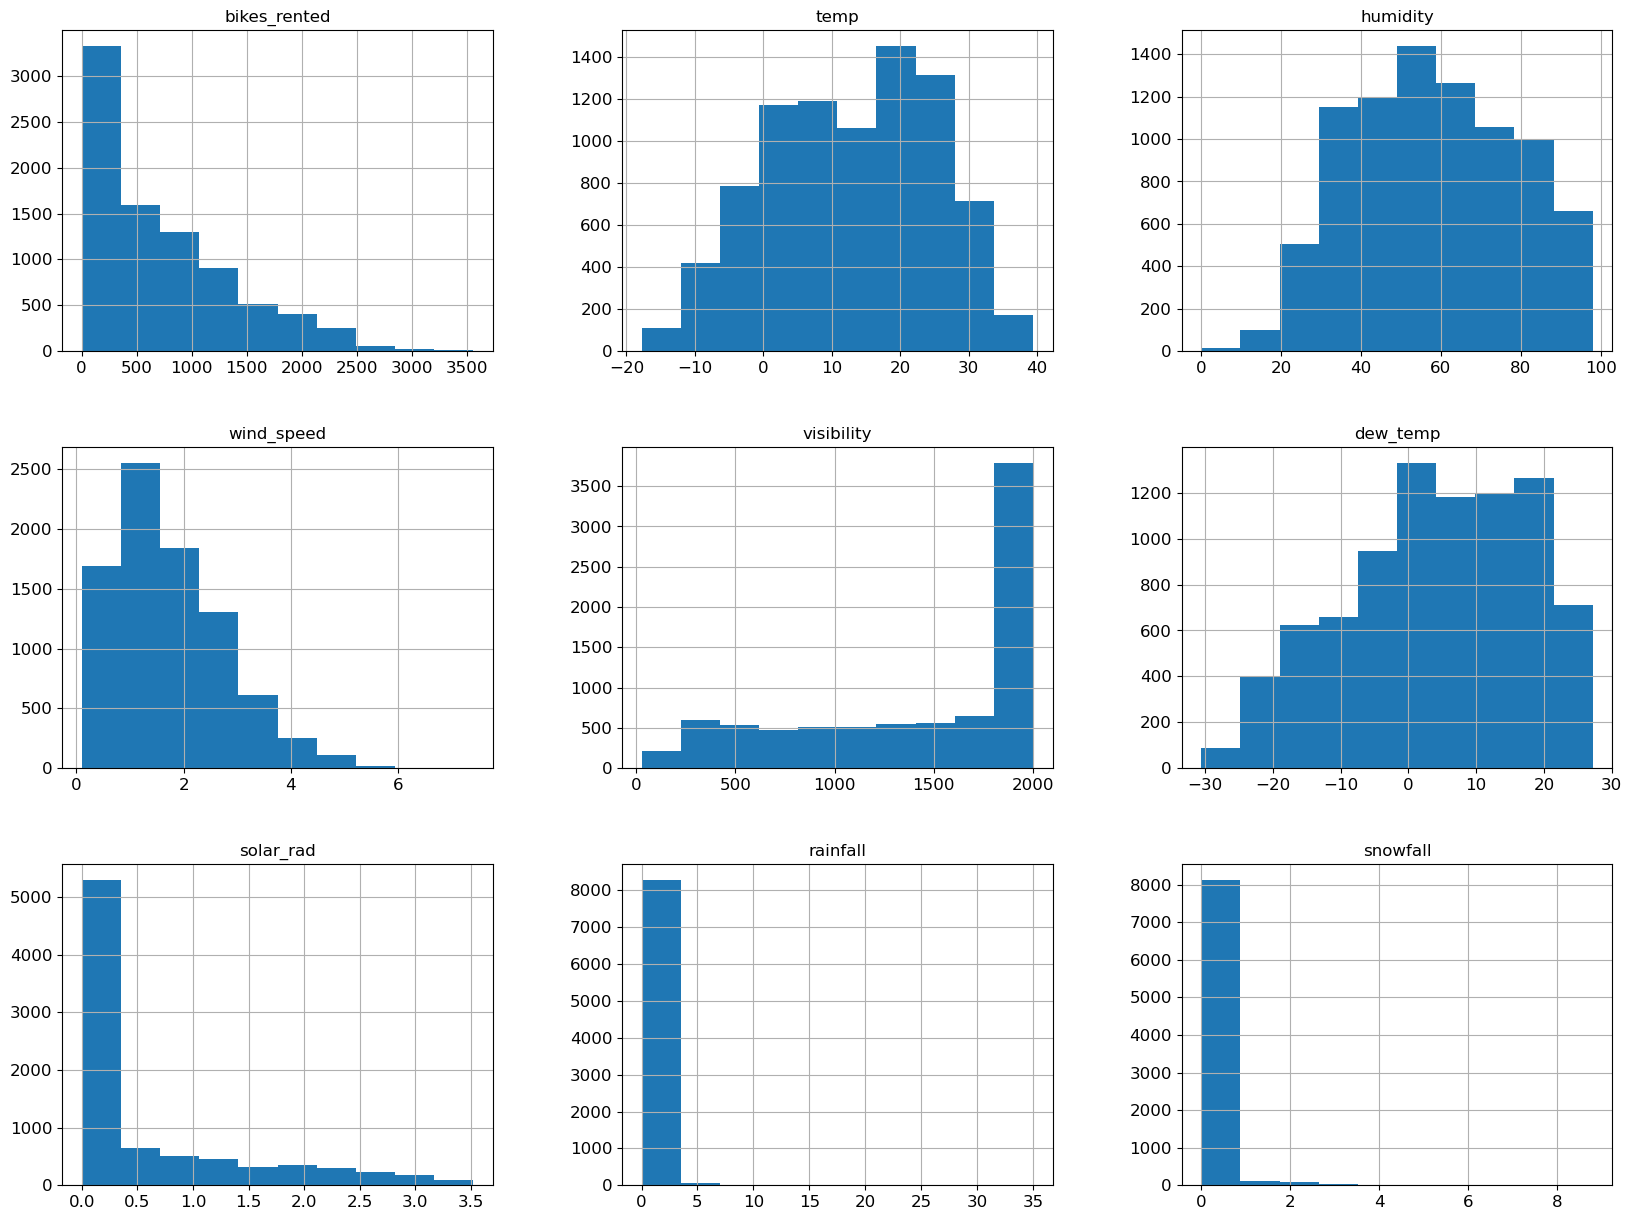

<Figure size 640x480 with 0 Axes>

In [54]:
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

data_raw.hist(figsize=(20,15));
plt.figure();

# Visualize with a geographic map to gain insights regarding location

# Split the data into training and testing sets and labels

In [56]:
# We need split the training and test datasets, as well as their labels
# Execute and complete a comparison between the original data and the training sets
from sklearn.model_selection import train_test_split

In [57]:
data_raw.shape

(8394, 9)

In [58]:
# Build your arrays
x = data_raw.iloc[:,1:]
y = data_raw.iloc[:,0]
x.values, y.values

(array([[-5.2, 37. ,  2.2, ...,  0. ,  0. ,  0. ],
        [-5.5, 38. ,  0.8, ...,  0. ,  0. ,  0. ],
        [-6. , 39. ,  1. , ...,  0. ,  0. ,  0. ],
        ...,
        [ 2.6, 39. ,  0.3, ...,  0. ,  0. ,  0. ],
        [ 2.1, 41. ,  1. , ...,  0. ,  0. ,  0. ],
        [ 1.9, 43. ,  1.3, ...,  0. ,  0. ,  0. ]]),
 array([254, 204, 173, ..., 694, 712, 584]))

In [87]:
# Confirm delta between arrays
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_train.shape, y_train.shape


((6715, 8), (6715,))

# Build and test a linear regression model - Round 1

In [94]:
from sklearn.linear_model import LinearRegression
from time import time

# Create a linear regression model
# Assemble the model in the training data as well as the models

from sklearn.linear_model import LinearRegression
LinReg = LinearRegression()
LinReg.fit (x_train,y_train)

LinearRegression()

# Use the holdout dataset to test the model

In [96]:
# Evaluate the model's performance using test data and labels
LinReg.score(x_test,y_test)


0.44786272917347336

# Compare predicted values to actual values

In [103]:
# Now, we'll need to make predictions on our test set
LinReg_pred = LinReg.predict(x_test)
# Let's look at the first 10 values against the actual values
LinReg_pred[:10]

array([ 857.323119  ,  751.8098849 ,  655.08069967, 1226.26561471,
       1590.38483999,  285.88722901, 1454.77870554,  711.79165875,
        325.36163583,  598.10222996])

In [113]:
y_test.iloc[:10]

2417     946
2933    1033
7268    1255
6342    2022
5697    1697
1259     184
5622     920
2431     616
1916     388
2650     668
Name: bikes_rented, dtype: int64

# Identify outliers

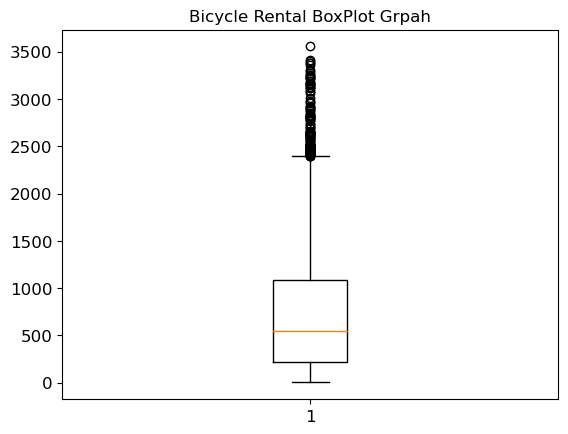

In [114]:
#Create a box plot to see distributions
plt.boxplot(x=data_raw.bikes_rented)
plt.title("Bicycle Rental BoxPlot Grpah")
plt.show()

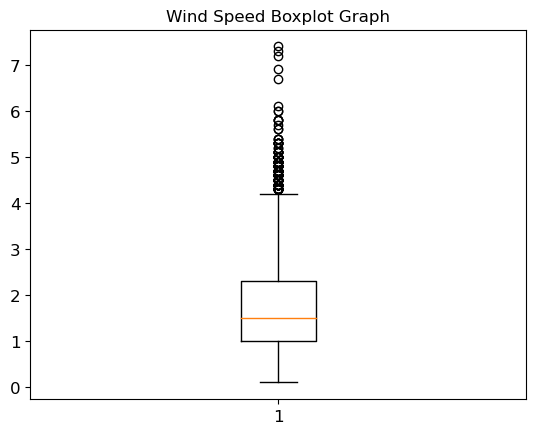

In [115]:
#Create an alternate boxplot to see the wind version
plt.boxplot(x=data_raw.wind_speed)
plt.title("Wind Speed Boxplot Graph")
plt.show()

# Examine data values in the outliers

In [116]:
#We're now goign to count the number of rows that exceed 3500 bikes rented, based on the Bike rental boxplot
data_raw[data_raw["bikes_rented"]>3500]

,bikes_rented,temp,humidity,wind_speed,visibility,dew_temp,solar_rad,rainfall,snowfall
4743,3556,24.1,57,2.9,1301,15.0,0.56,0.0,0.0


In [117]:
# We're going to do the same with Wind Speed
data_raw[data_raw["wind_speed"] > 6]

,bikes_rented,temp,humidity,wind_speed,visibility,dew_temp,solar_rad,rainfall,snowfall
909,146,0.7,77,6.7,692,-2.8,0.0,0.9,1.0
3108,913,21.2,35,7.4,1992,5.1,1.8,0.0,0.0
3112,1805,19.7,52,7.2,2000,9.5,0.2,0.0,0.0
3114,336,19.1,58,6.1,2000,10.6,0.0,0.0,0.0
3115,133,17.5,70,7.3,1634,11.9,0.0,0.5,0.0
6230,49,25.3,70,6.9,925,19.4,0.0,0.4,0.0


In [128]:
data_raw2.to_csv("Train_DataSet.csv",index=False)

# Drop outliers from the training dataset

In [118]:
#We need to get rid of outliers. So we'll only keep the rows that where the number of bikes rented is less than 3500
data_raw = data_raw[data_raw["bikes_rented"] < 3500]
data_raw


,bikes_rented,temp,humidity,wind_speed,visibility,dew_temp,solar_rad,rainfall,snowfall
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
8389,1003,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0
8390,764,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0
8391,694,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0
8392,712,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0


In [121]:
#We now need to keep just the rows where wind speed is less that 6 m/s
data_raw2 = data_raw[data_raw["wind_speed"]<6]
data_raw2

,bikes_rented,temp,humidity,wind_speed,visibility,dew_temp,solar_rad,rainfall,snowfall
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
8389,1003,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0
8390,764,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0
8391,694,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0
8392,712,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0


In [122]:
data_raw2.reset_index(drop=True)

,bikes_rented,temp,humidity,wind_speed,visibility,dew_temp,solar_rad,rainfall,snowfall
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
8380,1003,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0
8381,764,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0
8382,694,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0
8383,712,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0


# Compare the scale and distribution of bikes_rented and wind_speed

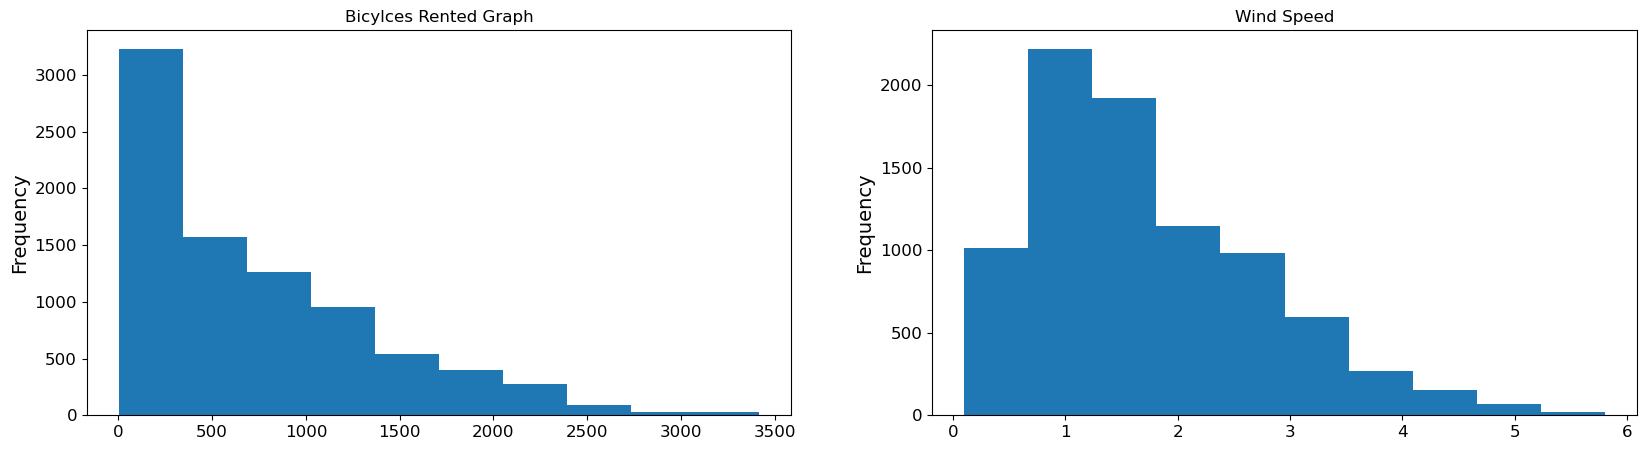

In [127]:
#Now, We're going to compare the distro on bikes rented versus wind speed
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
data_raw["bikes_rented"].plot(kind="hist")
plt.title("Bicylces Rented Graph")
plt.subplot(1,2,2)
data_raw2["wind_speed"].plot(kind="hist")
plt.title("Wind Speed")
         
plt.show()

# Perform a Transformation on bikes_rented and wind_speed. From there compare the results

In [129]:
#Reload Dataset we saved earlier
DataSet2 = pd.read_csv("Second_DataSet.csv")

In [136]:
#Confirm first few rows of loaded dataset
DataSet2.head()

,bikes_rented,temp,humidity,wind_speed,visibility,dew_temp,solar_rad,rainfall,snowfall
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0


In [144]:
DataSet2["log_wind_speed"] = np.log(DataSet2["wind_speed"])
DataSet2

,bikes_rented,temp,humidity,wind_speed,visibility,dew_temp,solar_rad,rainfall,snowfall,log_wind_speed
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0.788457
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,-0.223144
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0.000000
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,-0.105361
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0.832909
...,...,...,...,...,...,...,...,...,...,...
8380,1003,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0.955511
8381,764,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0.832909
8382,694,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,-1.203973
8383,712,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0.000000


In [150]:
DataSet2["log_bikes_rented"] = np.log(DataSet2["bikes_rented"])
DataSet2

,bikes_rented,temp,humidity,wind_speed,visibility,dew_temp,solar_rad,rainfall,snowfall,log_wind_speed,log_bikes_rented
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0.788457,5.537334
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,-0.223144,5.318120
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0.000000,5.153292
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,-0.105361,4.672829
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0.832909,4.356709
...,...,...,...,...,...,...,...,...,...,...,...
8380,1003,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0.955511,6.910751
8381,764,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0.832909,6.638568
8382,694,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,-1.203973,6.542472
8383,712,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0.000000,6.568078


In [154]:
x = DataSet2.iloc[:,0:8]
y = DataSet2.iloc[:,8]
# Prinout values from X & Y
x.values, y.values

(array([[254. ,  -5.2,  37. , ..., -17.6,   0. ,   0. ],
        [204. ,  -5.5,  38. , ..., -17.6,   0. ,   0. ],
        [173. ,  -6. ,  39. , ..., -17.7,   0. ,   0. ],
        ...,
        [694. ,   2.6,  39. , ...,  -9.9,   0. ,   0. ],
        [712. ,   2.1,  41. , ...,  -9.8,   0. ,   0. ],
        [584. ,   1.9,  43. , ...,  -9.3,   0. ,   0. ]]),
 array([0., 0., 0., ..., 0., 0., 0.]))

In [157]:
#Refine the data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)
#Shape the data
x_train.shape, y_train.shape

((6708, 8), (6708,))

In [158]:
#view the data in x_train
x_train

,bikes_rented,temp,humidity,wind_speed,visibility,dew_temp,solar_rad,rainfall
3357,155,14.6,42,0.5,2000,1.8,0.00,0.0
5147,760,20.7,58,1.5,2000,12.1,0.00,0.0
1433,59,-1.7,91,1.1,167,-2.9,0.00,0.0
4258,2650,21.2,52,3.6,1856,10.9,0.55,0.0
751,344,-3.2,69,0.5,1249,-8.0,0.00,0.0
...,...,...,...,...,...,...,...,...
4373,1148,26.5,43,3.9,1671,12.8,2.36,0.0
7891,754,11.3,77,0.9,433,7.4,0.00,0.0
4859,1801,23.9,72,0.8,1098,18.5,0.00,0.0
3264,987,11.2,31,1.7,1299,-5.3,1.59,0.0


# Build and test a linear regression model - Round 2

In [172]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model and fit it using the training data
LinReg = LinearRegression()

LinReg.fit(x_train, y_train)
LinearRegression()


LinearRegression()

# Compare the first ten predictions to actual values

In [173]:
# LinReg_PRD is the predicted prices that will be produced by testing
LinReg = LinReg.predict(x_test)

#view the first ten values
LinReg_pred[:10]

array([ 857.323119  ,  751.8098849 ,  655.08069967, 1226.26561471,
       1590.38483999,  285.88722901, 1454.77870554,  711.79165875,
        325.36163583,  598.10222996])

In [175]:
#Let's also take a look at y_test as well
y_test.iloc[:10]

7351    0.0
3608    0.0
8026    0.0
4382    0.0
244     0.0
8349    0.0
2730    0.0
8202    0.0
2812    0.0
7918    0.0
Name: snowfall, dtype: float64

# Switch the bike rentals back to actual values

In [190]:
# Need to call exp() function to convert back from log value to actual values.

import math

# View examples of the actual and predicted rentals

LinReg_pred

max_value = np.max(LinReg_pred)
scaled_LinReg_pred = LinReg_pred -max_value
exp_scaled_LinReg_pred = np.exp(scaled_LinReg_pred)
LinReg_pred_final = exp_scaled_LinReg_pred / np.sum(exp_scaled_LinReg_pred)
print (LinReg)
print (max_value)

[ 0.03703152  0.27632794  0.08713228 ...  0.0457923   0.11054258
 -0.21667886]
1820.2781318569573


# Try a different algorithm

In [201]:
# Create a model using the random forest algorithm.
from sklearn.ensemble import RandomForestRegressor

# Create the random forest regressor
rf = RandomForestRegressor(n_estimators=100, random_state=0)

# Fit the regressor to your training data
rf.fit(x_train, y_train)

# Make predictions on the test data
rf_pred = rf.predict(x_test)

# The rest of the code doesn't need to change, but here it is for reference:
max_value = np.max(rf_pred)
scaled_rf_pred = rf_pred - max_value
exp_scaled_rf_pred = np.exp(scaled_rf_pred)
rf_pred_final = exp_scaled_rf_pred / np.sum(exp_scaled_rf_pred)
print(rf_pred)
print(max_value)

[0. 0. 0. ... 0. 0. 0.]
3.4240000000000013


# View examples of the actual and predicted Rentals

In [227]:
import math
import pandas as pd

# Make predictions using the random forest regressor
predicted_rentals = rf.predict(x_test)

# Create a DataFrame to hold the actual and predicted number of bike rentals
predictions = pd.DataFrame(x_test, columns=['actual'])
predictions['predicted'] = predicted_rentals

# Define a function to scale the prices back to actual values
def rf_pred(x_test):
    return math.exp(x_test)

# Scale the prices back to actual values
predictions['predicted'] = predictions['predicted'].apply(rf_pred)

# View examples of the actual and predicted rentals
with pd.option_context('float_format', '{:,.2f}'.format):
    print(predictions.head(10))



      actual  predicted
7351     NaN       1.00
3608     NaN       1.00
8026     NaN       1.00
4382     NaN       1.00
244      NaN       1.04
8349     NaN       1.00
2730     NaN       1.00
8202     NaN       1.04
2812     NaN       1.00
7918     NaN       1.00
